In [1]:
from numpt import *

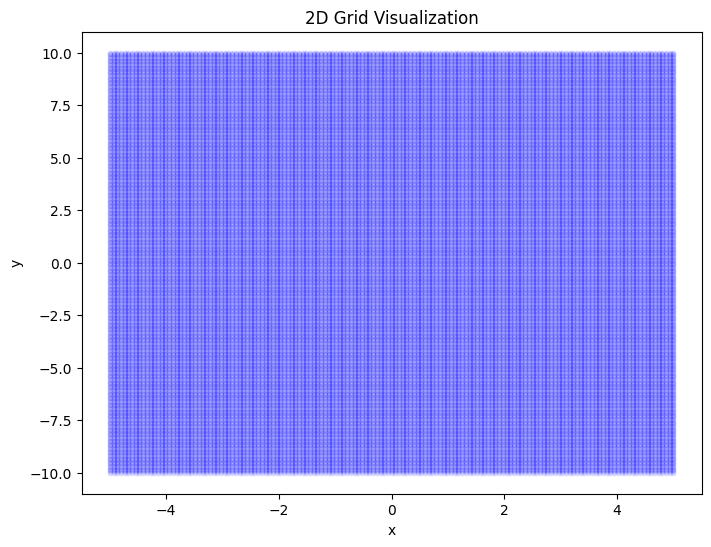

153 305


In [23]:
#-----------------------------------------------------------
# Characteristic lengths of the problem
#-----------------------------------------------------------
Lx = 1 # Characteristic length along x
Ly = 1 # Characteristic length along x

#-----------------------------------------------------------
# Problem's parameters
#-----------------------------------------------------------
hbar = 1
m = 1 # e-mass
wx = hbar / (m * Lx**2) # x confinement frequency
wy = hbar / (m * Ly**2) # x confinement frequency

#-----------------------------------------------------------
# Simulation parameters
#-----------------------------------------------------------
xbounds = (-5*Lx, 5*Lx) # 10 times the confinement length
ybounds = (-10*Ly, 10*Ly) # 10 times the confinement length

dx_max = 0.1 # Global maximum allowed spacing
dy_max = 0.1 # Global maximum allowed spacing

#-----------------------------------------------------------
# Creating grid
#-----------------------------------------------------------
mesh_obj = Mesh(dims=2,
                 xbounds=xbounds,
                 ybounds=ybounds,
                 dx_max=dx_max,
                 dy_max=dy_max,
                 dx_func = None,
                 dy_func= None,
                 dz_func= None,
                 max_iter= 10)

dimx = mesh_obj.Nx
dimy = mesh_obj.Ny
mesh_obj.visualize_grid(alpha = 0.1)
print(dimx, dimy)

In [24]:
#-----------------------------------------------------------
# Obtaining canonical operators
#-----------------------------------------------------------
operators = canonic_ops(mesh_obj, additional_subspaces = None, hbar=1)
px2 = operators.get_ops()["p2"][0]
x2 = operators.get_ops()["x2"][0]

py2 = operators.get_ops()["p2"][1]
y2 = operators.get_ops()["x2"][1]

#-----------------------------------------------------------
# Constructing the Hamiltonian
#-----------------------------------------------------------
H = Hamiltonian((px2 + py2) / (2*m) + 0.5 * m *( x2 * wx**2 + y2 * wy**2 ), mesh_obj)

In [25]:
k = 100
energies, wavefunctions = H.solve(k)

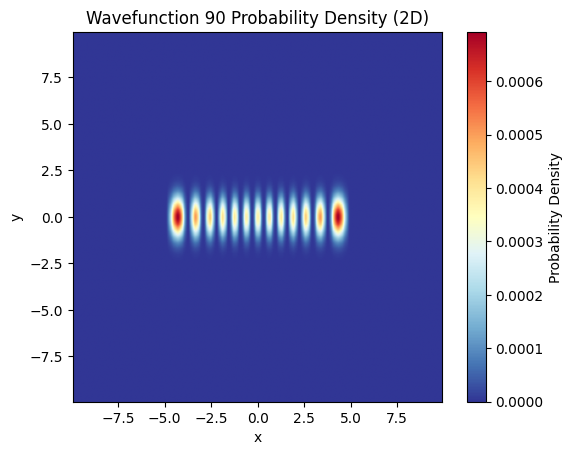

In [26]:
H.plot(90)

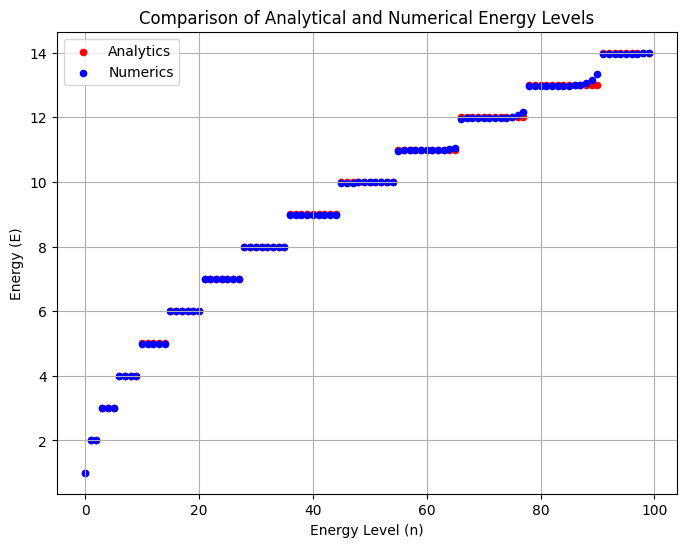

In [27]:
# Define the analytical energy function
def energy(nx, ny):
    return hbar * wx * (nx + 0.5) + hbar * wy * (ny + 0.5)

# Generate analytical energy levels
analytical_energies = sorted([energy(nx, ny) for nx in range(k) for ny in range(k)])[:k]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(k), analytical_energies, c="r", s=20, label="Analytics")
plt.scatter(range(k), energies, c="b", s=20, label="Numerics")
plt.legend()
plt.ylabel("Energy (E)")
plt.xlabel("Energy Level (n)")
plt.title("Comparison of Analytical and Numerical Energy Levels")
plt.grid(True)

plt.show()